In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
m = train[' Label'].size
n = test[' Label'].size

# Question 2(a). Plotting all the 9 polynomial equtions with Test Dataset

In [3]:
def cost_function(X,y,theta):
    J = 0
    m = m = y.shape[0]
    h = np.dot(theta,X)    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(theta, X) - y))
    return J

In [4]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.shape[0]  
    theta = theta.copy()
    
    J_history = [] 
    
    for i in range(num_iters): 
#         h = np.dot(theta,X) - y
        theta = theta - (alpha / m) * (np.dot(theta,X) - y).dot(X.T)
        J_history.append(cost_function(X, y, theta))
    
    return theta, J_history

In [5]:
def LG(train,test,k,alpha,iterations):
    errors = []
    Xtr = train['Feature']
    Ytr = np.array(train[' Label'])
    Xts = np.array(test['Feature'])
    Yts = np.array(test[' Label'])
    Xtr = np.array([Xtr**i for i in range(k+1)])
    Xts = np.array([Xts**i for i in range(k+1)])
    theta = np.zeros(k+1)
    theta, J_history = gradientDescent(Xtr ,Ytr, theta, alpha, iterations)
    predict = np.dot(theta,Xts)
    print('                      Curve          ')
    plt.scatter(test['Feature'],test[' Label'])
    plt.scatter(Xts[1,:],predict)
    plt.xlabel('Feature')
    plt.ylabel('Label')
    plt.pause(0.000001)
    print('               Error vs Iterations')
    plt.plot(J_history)
    plt.xlabel('Iterations')
    plt.ylabel('Error')
#     errors.append((J_history[-1], cost_function(Xts, Yts, theta)))
    return J_history[-1], cost_function(Xts, Yts, theta)

######### Currently doing for Polynomial Order = 1 #########
                      Curve          


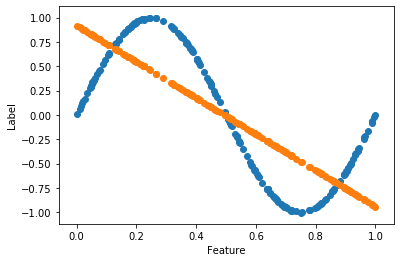

               Error vs Iterations


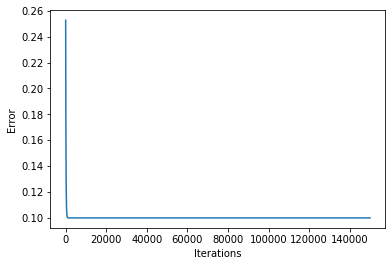

######### Currently doing for Polynomial Order = 2 #########
                      Curve          


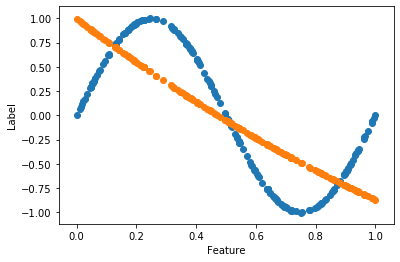

               Error vs Iterations


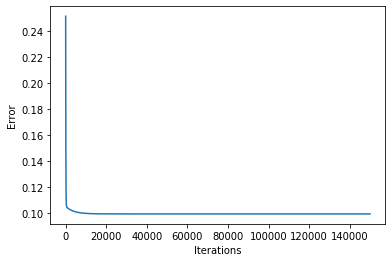

######### Currently doing for Polynomial Order = 3 #########
                      Curve          


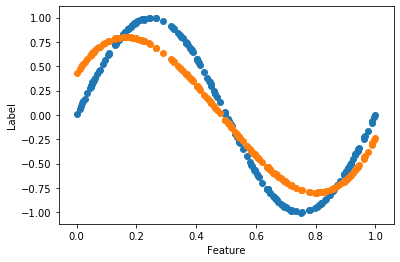

               Error vs Iterations


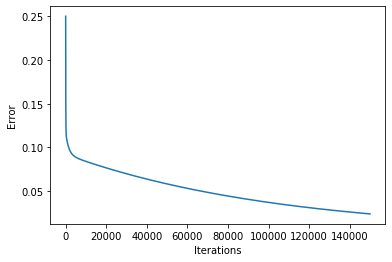

######### Currently doing for Polynomial Order = 4 #########
                      Curve          


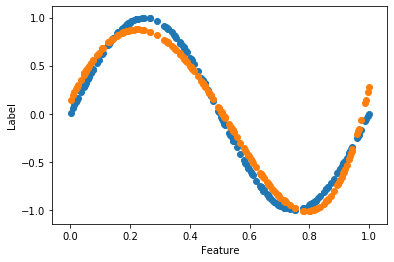

               Error vs Iterations


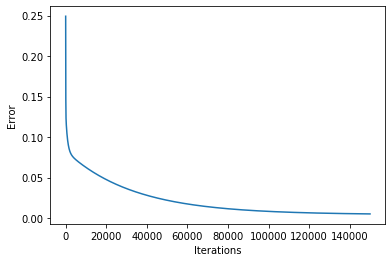

######### Currently doing for Polynomial Order = 5 #########
                      Curve          


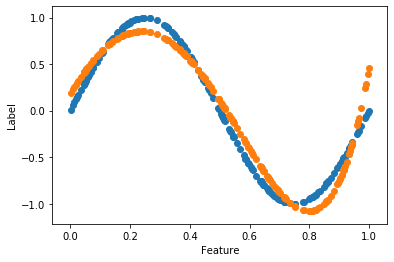

               Error vs Iterations


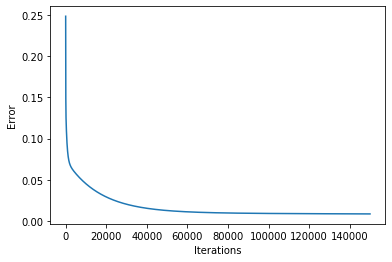

######### Currently doing for Polynomial Order = 6 #########
                      Curve          


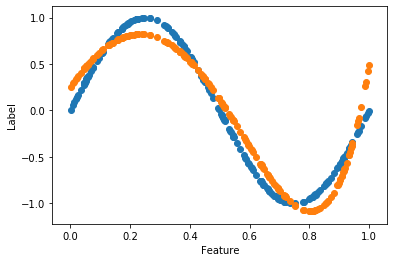

               Error vs Iterations


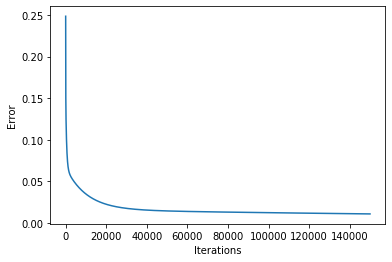

######### Currently doing for Polynomial Order = 7 #########
                      Curve          


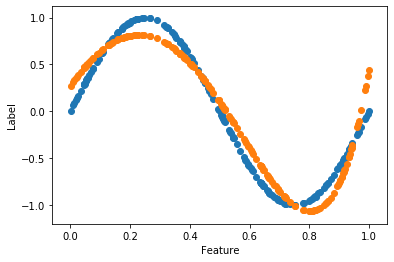

               Error vs Iterations


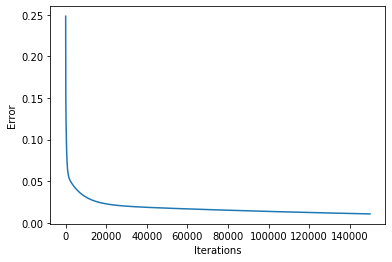

######### Currently doing for Polynomial Order = 8 #########
                      Curve          


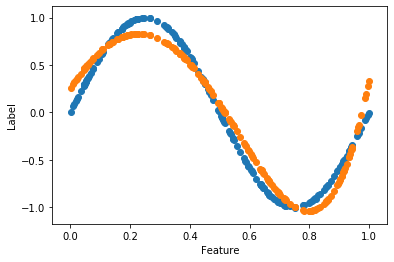

               Error vs Iterations


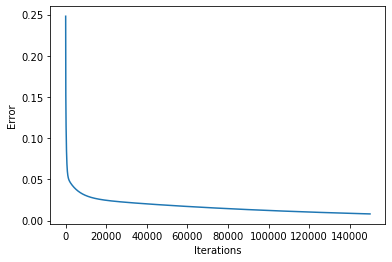

######### Currently doing for Polynomial Order = 9 #########
                      Curve          


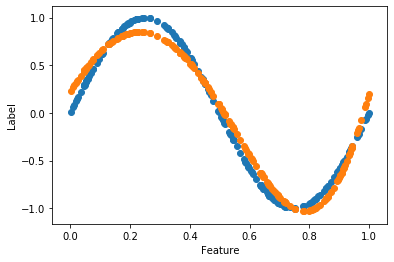

               Error vs Iterations


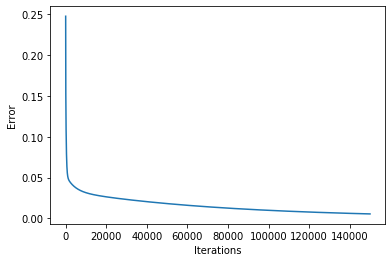

In [6]:
errtr=[]
errts=[]
for i in range(1,10):
    print('######### Currently doing for Polynomial Order = '+str(i)+' #########')
    _1, _2 = LG(train,test,i,0.05,150000)
    errtr.append(_1)
    errts.append(_2)
    plt.pause(0.000001)

# Question 2(b). Plots of train and test error with respect to polynomial order

Text(0, 0.5, 'Errors')

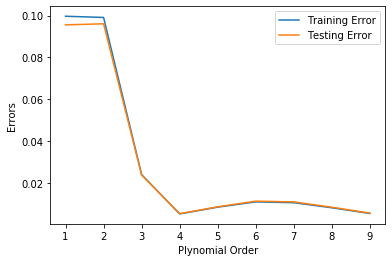

In [7]:
n = [i for i in range(1,10)]
plt.plot(n,errtr)
plt.plot(n,errts)
plt.legend(['Training Error', 'Testing Error'])
plt.xlabel('Plynomial Order')
plt.ylabel('Errors')

# Answer for the value of N(Question 2(b)):
As we can see from the error graph the error value for both training set and test set is minimum for N = 4. Also from the curve fitting part we can see the best fit is achieved at N = 4. Therefore, we choose N = 4 as a suitable value for the dataset that we have. Please note the following result is based on 1,50,000 iterations when the error values for all the order polynomials began to saturate.